# What are the most common programming languages used in Japan??

An analysis of data from Stack Overflow's 2017 and 2018 Annual Developer Surveys.

<img src='https://cotoacademy.com/tokyotech/wp-content/uploads/2022/10/Blog-Feature-Image-1.png'></img>

## Introduction

With the emergence of new fields in Japan such as Artificial Intelligence and Data Science, several programming languages that were previously underutilized are now gaining popularity.

You might have heard statements like "Python is currently the dominant programming language" or "Functional programming is superior to Object-Oriented programming".

In this article, we will analyze real data to determine the actual usage of these programming languages in Japan, distinguishing between fact and mere hearsay.

To achieve this, we will utilize data from Stack Overflow's Annual Developer Survey for the years 2017 and 2018.

Each year, Stack Overflow conducts an extensive survey among its users, gathering insights into programming languages, employment trends, coding practices, and various other topics.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS1mvZ_iIRrWl08VZ-vxCwApQItiV7KX1RTrldjflujvWI2_cb-w'></img>

Each year, Stack Overflow conducts an extensive survey of its users, gathering a wide range of data on topics such as programming languages, job roles, coding practices, and more.

The survey comprised over 150 questions, including:

**“Which frameworks do you use?”** <br>
**“Do you program as a hobby or contribute to open source projects?”** <br>
**“Which IDE do you prefer?”** <br>

In [5]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Reading Stackoverflow survey data
df_2017 = pd.read_csv('data/2017/survey_results_public.csv')
df_2018 = pd.read_csv('data/2018/survey_results_public.csv')

In [14]:
# Sample 2017 Data
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [15]:
# Sample 2018 Data
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

## Part 1. Which programming languages are most commonly used, and which are most in demand?

In [18]:
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Japan and selecting some columns.
japan_2017= filter_country(df_2017, 'Country', 'Japan', ['HaveWorkedLanguage', 'WantWorkLanguage'])
japan_2018 = filter_country(df_2018, 'Country', 'Japan', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [19]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_lang_2017 = split_column(japan_2017, 'HaveWorkedLanguage')
wanted_lang_2017 = split_column(japan_2017, 'WantWorkLanguage')

worked_lang_2018 = split_column(japan_2018, 'LanguageWorkedWith')
wanted_lang_2018 = split_column(japan_2018, 'LanguageDesireNextYear')

In [21]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2017 = disarray(worked_lang_2017)
list_wanted_languages_2017 = disarray(wanted_lang_2017)

list_worked_languages_2018 = disarray(worked_lang_2018)
list_wanted_languages_2018 = disarray(wanted_lang_2018)

In [22]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2017 = group_list(list_worked_languages_2017, '2017')
dict_wanted_languages_2017 = group_list(list_wanted_languages_2017, '2017')

dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = group_list(list_wanted_languages_2018, '2018')

In [24]:
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2017, dict_worked_languages_2018])
wanted_languages = create_dataframe([dict_wanted_languages_2017, dict_wanted_languages_2018])

In [25]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [26]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

Classic languages like **JavaScript**, **Java**, and **Python** continue to hold top positions in the Stack Overflow survey data for both 2017 and 2018.

In 2018, the programming languages **HTML** and **CSS** saw a rise in popularity. Despite being old and commonly used, their increase could be attributed to the 2017 StackOverflow Survey, where these languages were likely not available as selectable options.

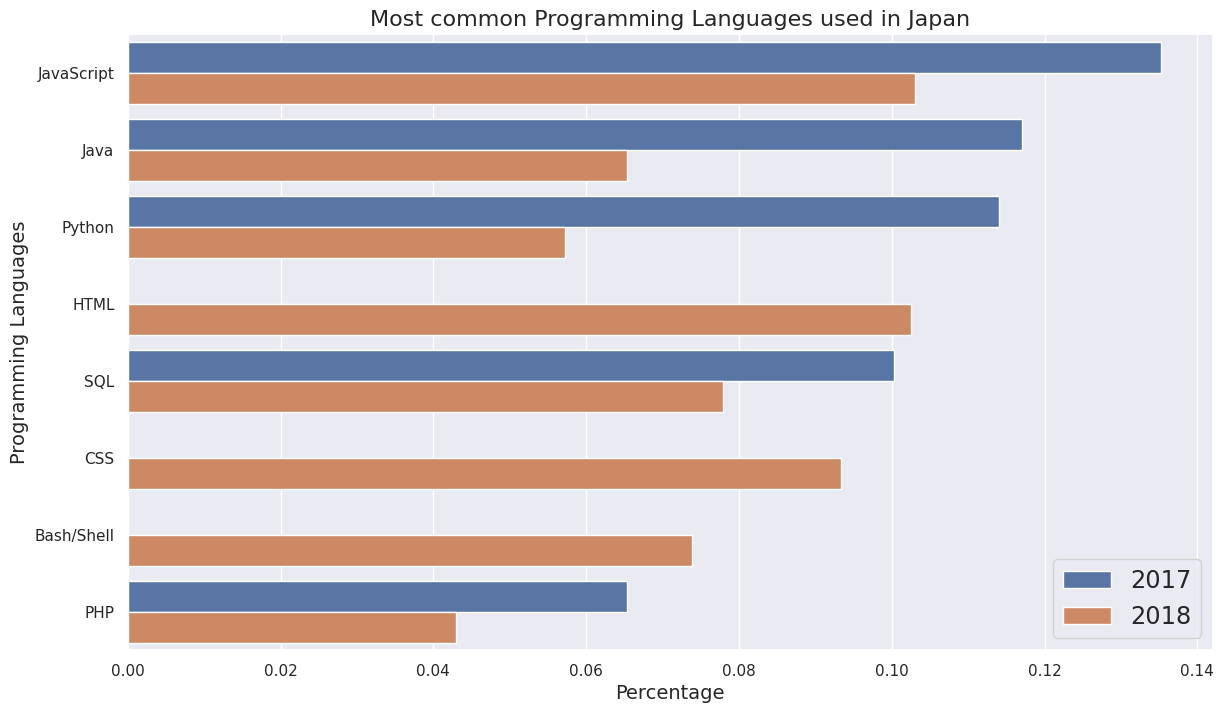

In [30]:
# Figure 1 — Percentage usage of cited programming languages
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='30')
plt.title('Most common Programming Languages used in Japan', size = 16)
plt.show()

## Part 2 — What are the most wanted programming languages in Japan?

Python was among the top 3 most in-demand programming languages in Japan during 2017 and 2018 for several reasons:

1. **Growth of Data Science and AI**: Python's simplicity and readability make it an ideal choice for data science, artificial intelligence, and machine learning. Its extensive libraries and frameworks, such as TensorFlow, Keras, and scikit-learn, support these fields.

2. **Versatility and Ease of Learning**: Python is known for its easy-to-read syntax and versatility, making it a favorite among beginners and experienced developers alike. This has led to its widespread adoption in various industries.

3. **Strong Community and Ecosystem**: Python has a large and active community, providing extensive documentation, tutorials, and support. This robust ecosystem encourages its use in diverse applications.

4. **Automation and Scripting**: Many organizations use Python for automating repetitive tasks and scripting, which enhances productivity and efficiency in software development and IT operations.

5. **Web Development**: Frameworks like Django and Flask make Python a powerful option for web development, contributing to its demand among web developers in Japan.

6. **Adoption in Education**: Python is widely taught in schools and universities due to its simplicity, which has increased its popularity among new graduates entering the workforce.

These factors collectively contributed to Python's high demand in the Japanese job market during those years.

Most of the programming languages that are widely used in professional settings also appear among the most desired programming languages, indicating a significant interest among people to learn these languages.

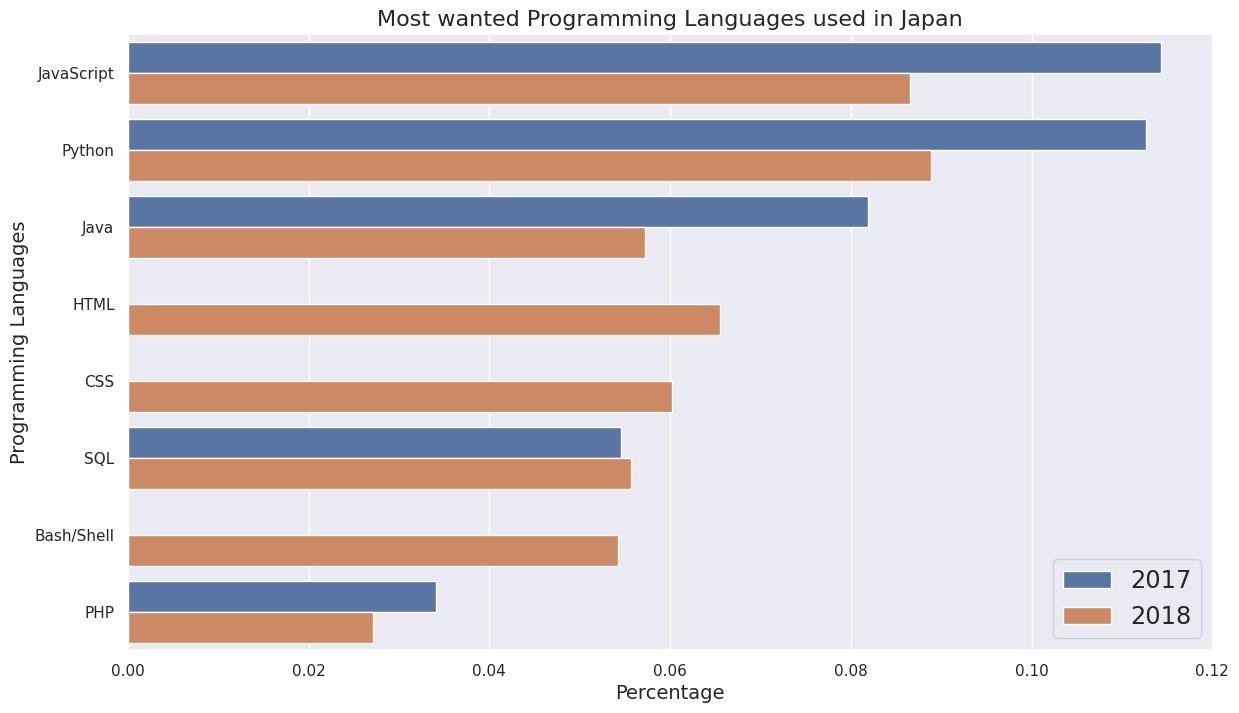

In [36]:
# Figure 2 — Percentage of mentions of programming languages among all citations
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in Japan', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

## Part 3 —How does the programming languages used at work relate to the programming languages people want to learn?

By examining the raw data, we can identify patterns, such as the fact that people who use Python at work often express a desire to learn Python in the coming year.

A natural question arises:

**"Does the pattern observed for Python hold for the other languages?"**

To address this question, we constructed a heat map that shows the relationship between the employed programming languages and the desired ones. The darker shades indicate a stronger correlation with the desired programming languages.

In [32]:
# Grouping data to create a new dataframe

rows = []
for itens in list(zip(worked_lang_2018, wanted_lang_2018)):
    for i in itens[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(itens[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

In [33]:
# Creating a matrix

for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

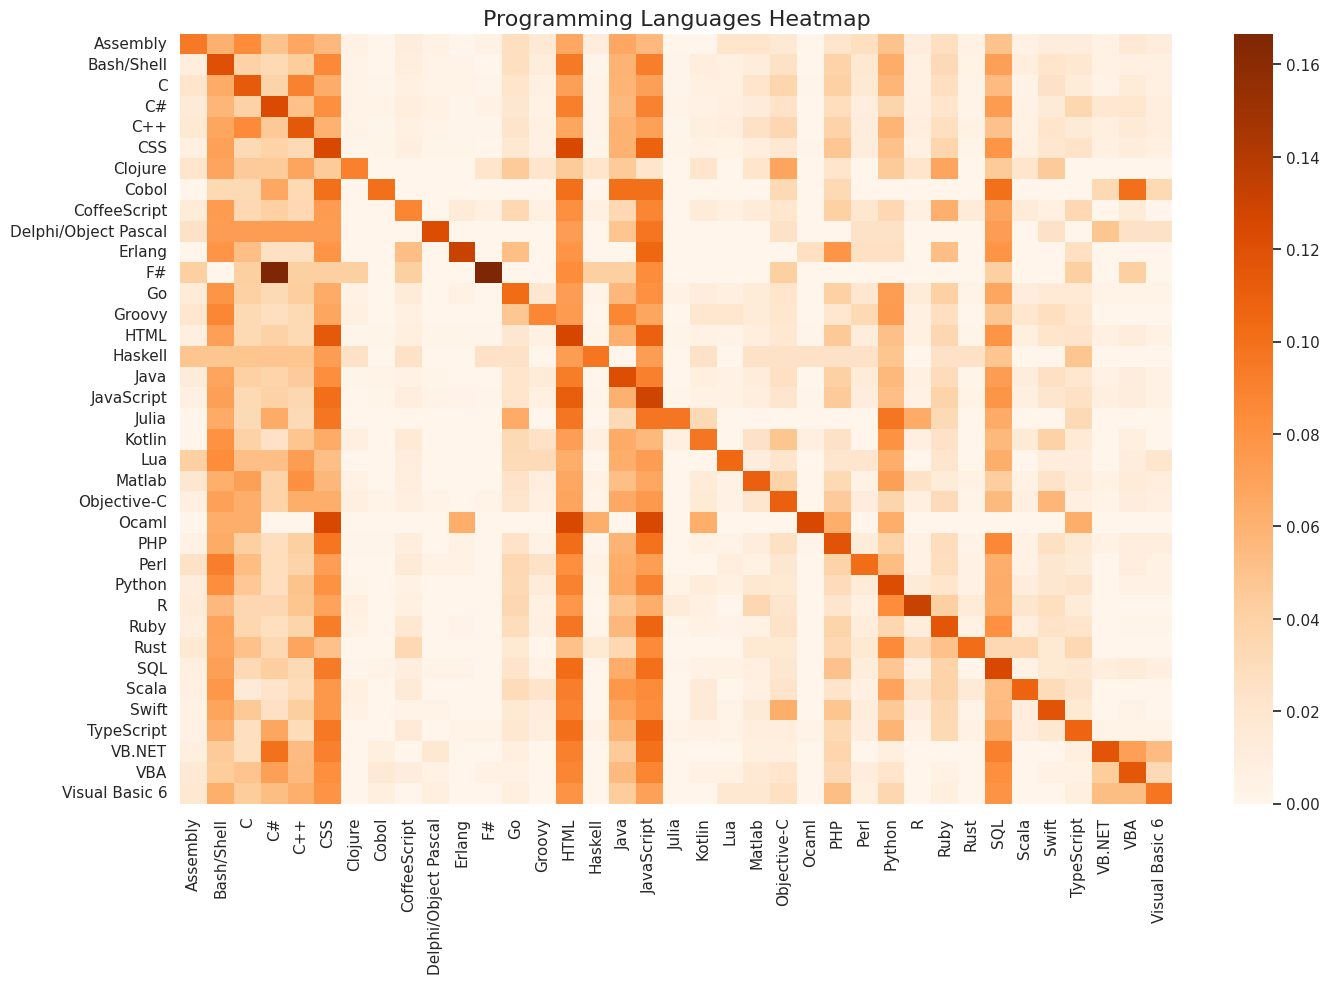

In [35]:
## Figure 3 — The relationship between programming languages used at work and preferred programming languages
## languages in 2017 and 2018.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="Oranges")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

With this figure we can have three insights:

1. As indicated by the diagonal line, individuals who are already proficient in a programming language are highly likely to desire further learning in that same language.

2. People who specialize in a programming language within a specific domain often desire to learn other languages within that domain. For instance, **HTML** is closely associated with **CSS** and **JavaScript**.

3. **SQL** remains an indispensable language that is essential to learn and apply in the workplace.

## Conclusion

Certainly! Here are the revised sentences:

1. In this article, we explored which programming languages, such as **JavaScript**, **Java**, and **Python**, continue to dominate, despite their age.
   
2. While newer programming languages like **Python** are worth learning, traditional languages retain their value and are still highly sought after.

3. Professionals often choose to expand their skills by learning the language they already work with, or related languages in connected domains.

These revisions aim to clarify and streamline the original sentences for better readability and coherence.

To see more about this analysis, see the link to my medium post available [here](https://medium.com/@ericvenarusso2/what-are-the-most-common-programming-languages-used-in-brazil-8d630b76df2f).

## References

Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey) <br>
Medium: [https://medium.com/@heou8993/what-are-the-most-common-programming-languages-used-in-japan-489f89c6b6fa](https://medium.com/@heou8993/what-are-the-most-common-programming-languages-used-in-japan-489f89c6b6fa)